In [1]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.animation import FuncAnimation

In [16]:
class Diffur:
    def __init__(self, NX, M = 1.,K =1.,T=1., la = 0.0001):
        self.tau = 0.01
        self.la = la
        self.NX = NX
        self.NY = NX
        self.hx = M/NX
        self.hy = K/NX
        self.M = M
        self.K = K
        self.T = T
        self.t = np.arange(0,T+self.tau,self.tau)
        self.x = np.arange(0,M+self.hx, self.hx)
        self.y = np.arange(0, K+self.hy, self.hy)
        self.u_xy0 = np.zeros((len(self.y), len(self.x)))
        def First_layer(self):
            def f(x,y):
                return np.cos(np.pi*x)*np.sin(5*np.pi*y)
            c1 = 0
            for j in self.y:
                c2 = 0
            for i in self.x:
                self.u_xy0[c1][c2] = f(i,j)
                c2+=1
            c1+=1
        First_layer(self)
        self.L = list()
    
    
    def Borders(self, V, i):
        V.T[0] = np.sin(5*np.pi*self.y)*np.exp(-50*np.pi**2*self.la*self.t[i])
        V.T[-1] = -np.sin(5*np.pi*self.y)*np.exp(-50*np.pi**2*self.la*self.t[i])
        V[0] = np.zeros(len(self.x))
        V[-1] = np.zeros(len(self.x))
        return V
    
    def Main(self):
        self.L.append(self.u_xy0)
        i = 1
        while i < len(self.t):
            V = np.zeros((len(self.y), len(self.x)))
            V = self.Borders(V, i)
            k = 1
            while k < len(self.y)-1:
                M = np.zeros((len(self.x), len(self.x)))
                M[0][0] = 1
                M[-1][-1] = 1
                q = 1
                while q < len(M[0])-1:
                    M[q][q+1] =  25*self.la/self.hx**2
                    M[q][q] = -(50*self.la/self.hx**2 +2*self.la/self.hy**2 + 1/self.tau)
                    M[q][q-1] = 25*self.la/self.hx**2
                    q+=1
                u0 = np.zeros(len(self.x))
                u0 = -self.la/self.hy**2*self.L[i-1][k+1] - self.la/self.hy**2*V[k-1] - self.L[i-1][k]/self.tau
                u0[0] = V[k][0]
                u0[-1] = V[k][-1]
                u = np.dot(np.linalg.inv(M), u0)
                V[k] = u
                k+=1
            self.L.append(V)
            i+=1
        return self.L
    
    def Fig(self, i):
        u = self.L[i]
        x, y = np.meshgrid(self.x,self.y)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x, y, u)
    def Fig_analitical(self, t):
        u = np.zeros((len(self.y), len(self.x)))
        def f(x,y):
            return np.cos(np.pi*x)*np.sin(5*np.pi*y)*np.exp(-50*np.pi**2*self.la*self.t[t])
        c1 = 0
        for j in self.y:
            c2 = 0
            for i in self.x:
                u[c1][c2] = f(i,j)
                c2+=1
            c1+=1
        x, y = np.meshgrid(self.x,self.y)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(x, y, u)

In [20]:
a = Diffur(50)
b = a.Main()


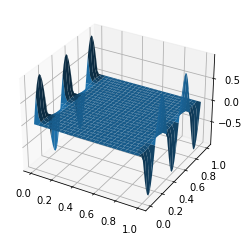

In [21]:
a.Fig(5)

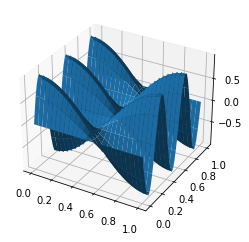

In [22]:
a.Fig_analitical(5)